## EXPLORATARY DATA ANALYSIS OF TITANIC DATASET

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib as plt
%matplotlib inline


In [109]:
train = pd.read_csv('titanic_train.csv')
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Missing Data

In [69]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

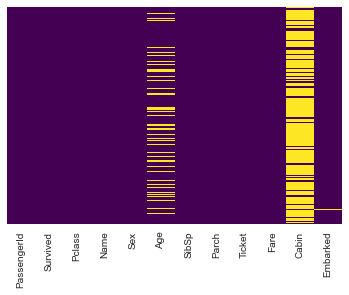

In [70]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

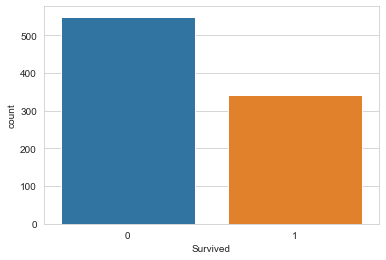

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

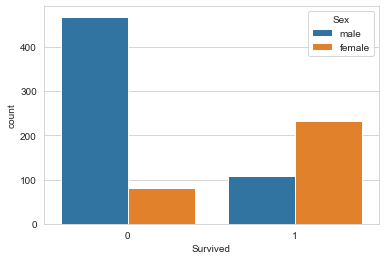

In [10]:
sns.countplot(x='Survived',hue='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

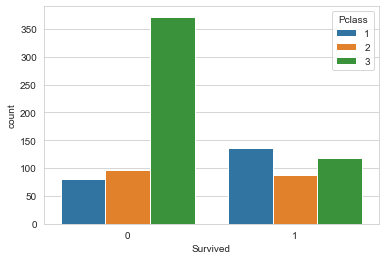

In [11]:
sns.countplot(x='Survived',hue='Pclass',data=train)

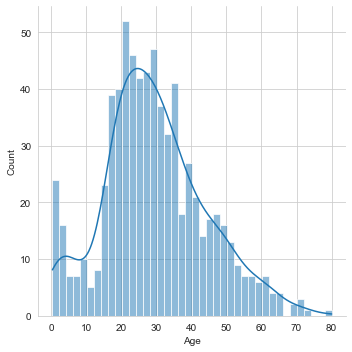

In [17]:
sns.displot(train["Age"].dropna(),kde=False,bins=40)

# get the deatils of distribution of age in the dataset

<AxesSubplot:xlabel='SibSp', ylabel='count'>

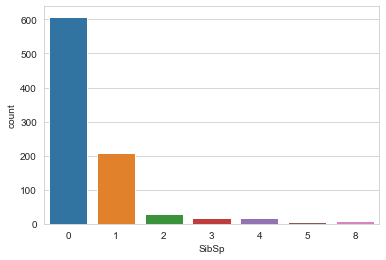

In [18]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

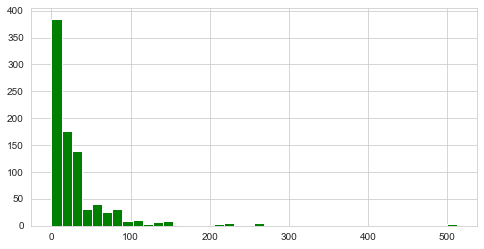

In [21]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

### DATA CLEANING

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

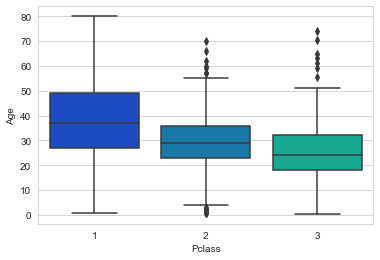

In [110]:
# plt.figure(figsize=(12,7))

sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [111]:
# was taking care of data in age column and replacing them with the average
# value of passenger class

def impute_age(cols):
    Age=cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        if Pclass ==2:
            return 29
        else:
            return 25
        
    else:
        return Age



In [112]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

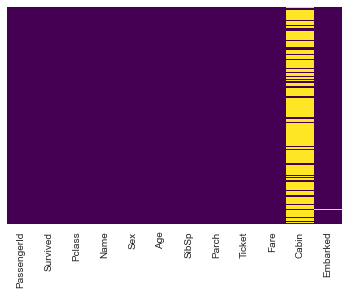

In [113]:
sns.heatmap(data=train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [114]:
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

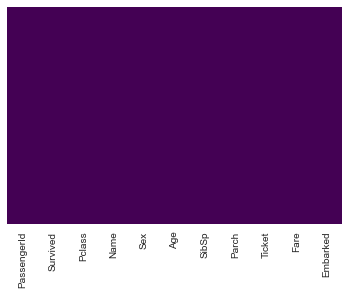

In [118]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [116]:
train.dropna(axis=0,how='any',inplace=True)

In [117]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [121]:
train2 = train.copy()
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [130]:
# converting categorical data as number

embark = pd.get_dummies(train2['Embarked'],drop_first=True)

sex = pd.get_dummies(train2['Sex'],drop_first=True)



In [131]:
train2.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [132]:
train2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [133]:
train2 = pd.concat([train2,sex,embark],axis=1)
train2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### LOGISTIC REGRESSION MODEL

In [134]:
train2_x =train2.drop('Survived',axis=1)    

In [135]:
from sklearn.model_selection import train_test_split

In [137]:
X_train,X_test,Y_train,Y_test = train_test_split(train2_x,train2['Survived'],test_size=0.3,random_state=101)

#### training and Predicting

In [138]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

c:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [139]:
predictions = logmodel.predict(X_test)

In [144]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = confusion_matrix(Y_test,predictions)
accuracy

array([[148,  15],
       [ 38,  66]], dtype=int64)

In [145]:
accuracy2 = accuracy_score(Y_test,predictions)
accuracy2

0.8014981273408239